In [1]:
import sys
sys.path.append('/home/svdcvt/miniconda3/lib/python3.8/site-packages')
import tinkhorn
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [664]:
N = 500

t = np.arange(0,N)/N

Gaussian = lambda t0,sigma: np.exp(-(t-t0)**2/(2*sigma**2))
normalize = lambda p: p/np.sum(p)

sigma = .06
a = Gaussian(.25,sigma)# + Gaussian(.4,0.07)/2
b = Gaussian(.8,sigma/2) + Gaussian(.6,sigma/2)

vmin = .02;
a = normalize( a+np.max(a)*vmin)
b = normalize( b+np.max(b)*vmin)

In [665]:
e = [0.005, 0.01, 0.02, 0.05, 0.1]
it = [100, 50, 50, 10, 2]

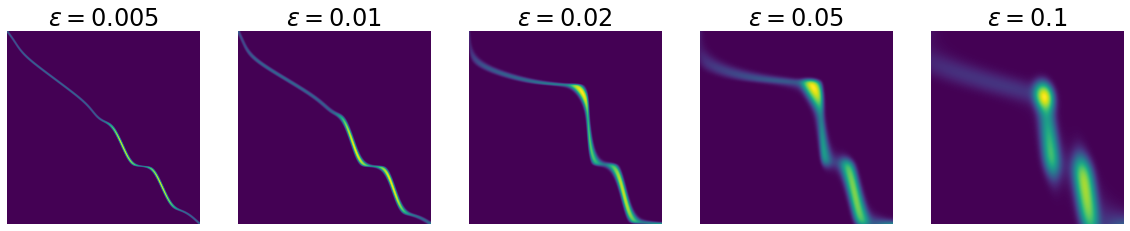

In [666]:
plt.figure(figsize=(20, 4))
for n in range(5):
    
    epsilon = (e[n])**2
    [Y,X] = np.meshgrid(t,t)
    K = np.exp(-(X-Y)**2/epsilon)

    v = np.ones(N)
    for i in range(it[n]):
        u = a / (np.dot(K,v))
        v = b / (np.dot(np.transpose(K),u))
    P = np.dot(np.dot(np.diag(u),K),np.diag(v))
    s = np.dot(K,v*t)*u/a
    
    plt.subplot(1, 5, n+1)
    plt.title(f'$\epsilon={e[n]}$', fontsize=24)
    plt.imshow(np.log(P+1e-5))
#     plt.plot(s*N, t*N, c='r', linewidth=4)
    plt.axis('off')
plt.savefig('epsilon_range.pdf')
plt.show()

In [105]:
N = 200

t = np.arange(0,N)/N

Gaussian = lambda t0,sigma: np.exp(-(t-t0)**2/(2*sigma**2))
normalize = lambda p: p/np.sum(p)

sigma = .06
a = Gaussian(.25,sigma)# + Gaussian(.4,0.07)/2
b = Gaussian(.8,sigma/2) + Gaussian(.6,sigma/2)

vmin = .02;
a = normalize( a+np.max(a)*vmin)
b = normalize( b+np.max(b)*vmin)

epsilon = (0.03)**2
[Y,X] = np.meshgrid(t,t)
K = np.exp(-(X-Y)**2/epsilon)

v = np.ones(N)
for i in range(10000):
    u = a / (np.dot(K,v))
    v = b / (np.dot(np.transpose(K),u))
P = np.dot(np.dot(np.diag(u),K),np.diag(v))
s = np.dot(K,v*t)*u/a

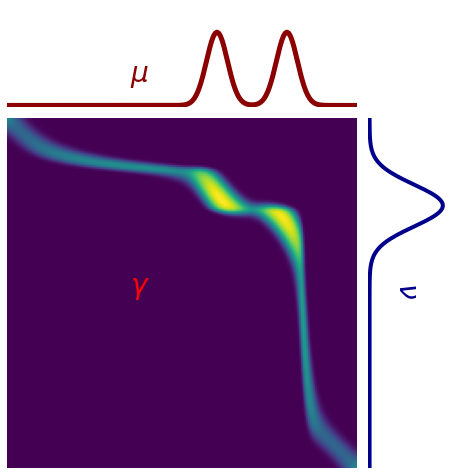

In [106]:
fig = plt.figure(figsize=(8, 8))


gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0])#, sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1])#, sharey=ax)

# use the previously defined function
ax.imshow(np.log(P+1e-5))
# ax.plot(s*N, t*N, c='r', linewidth=4)
ax.text(70, 100, '$\gamma$', c='r', fontsize=28)
ax.axis('off');

ax_histy.plot(a, t*N, color = "darkblue", linewidth=4)
ax_histy.text(0.01, 100, '$\\nu$', fontsize=28, color='darkblue', rotation=270)
ax_histy.set_ylim(N, 0)
ax_histy.set_xlim(0, 0.04)
ax_histy.axis('off')

ax_histx.plot(t*N, b, color = "darkred", linewidth=5)
ax_histx.text(70, 0.01, '$\mu$', fontsize=28, color='darkred')
ax_histx.set_xlim(0, N)
ax_histx.set_ylim(0, 0.04)
ax_histx.axis('off')
plt.savefig('plan.pdf', bbox_inches='tight')

plt.show()

In [107]:
N = 50

t = np.arange(0,N)/N

Gaussian = lambda t0,sigma: np.exp(-(t-t0)**2/(2*sigma**2))
normalize = lambda p: p/np.sum(p)

sigma = .06
a = Gaussian(.25,sigma)# + Gaussian(.4,0.07)/2
b = Gaussian(.8,sigma/2) + Gaussian(.6,sigma/2)

vmin = .02;
a = normalize( a+np.max(a)*vmin)
b = normalize( b+np.max(b)*vmin)

epsilon = (0.03)**2
[Y,X] = np.meshgrid(t,t)
K = np.exp(-(X-Y)**2/epsilon)

v = np.ones(N)
for i in range(10000):
    u = a / (np.dot(K,v))
    v = b / (np.dot(np.transpose(K),u))
P = np.dot(np.dot(np.diag(u),K),np.diag(v))
s = np.dot(K,v*t)*u/a

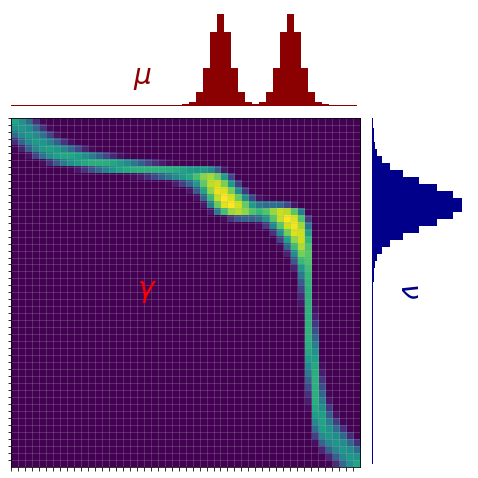

In [108]:
fig = plt.figure(figsize=(8, 8))


gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0])#, sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1])#, sharey=ax)

# use the previously defined function
ax.imshow(np.log(P+1e-5))
# ax.scatter(((s*N).astype(int)*49/48).astype(int), (t*N).astype(int), c='r', marker='s', s=30)
ax.text(17.5, 25, '$\gamma$', c='r', fontsize=28)
ax.set_xlim(-0.5, N-0.5)
ax.set_ylim(N-0.5, -0.5)
ax.set_xticks(np.arange(N)-0.5)
ax.set_yticks(np.arange(N)-0.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(1, alpha=0.3)
# ax.axis('off');

ax_histy.barh(t*N, a, height=1, color = "darkblue", linewidth=4)
ax_histy.text(0.03, 25, '$\\nu$', fontsize=28, color='darkblue', rotation=270)
ax_histy.set_ylim(N, 0)
ax_histy.set_xlim(0, 0.13)
ax_histy.axis('off')

ax_histx.bar(t*N, b, width=1, color = "darkred", linewidth=5)
ax_histx.text(17.5, 0.03, '$\mu$', fontsize=28, color='darkred')
ax_histx.set_xlim(0, N)
ax_histx.set_ylim(0, 0.13)
ax_histx.axis('off')
plt.savefig('plan_c.pdf', bbox_inches='tight')

plt.show()

In [84]:
N = 200

t = np.arange(0,N)/N

Gaussian = lambda t0,sigma: np.exp(-(t-t0)**2/(2*sigma**2))
normalize = lambda p: p/np.sum(p)

sigma = .06
a = Gaussian(.25,sigma)# + Gaussian(.4,0.07)/2
b = Gaussian(.8,sigma/2) + Gaussian(.6,sigma/2)

vmin = .02;
a = normalize( a+np.max(a)*vmin)
b = normalize( b+np.max(b)*vmin)

epsilon = (0.06)**2
[Y,X] = np.meshgrid(t,t)
K = np.exp(-(X-Y)**2/epsilon)

v = np.ones(N)
for i in range(100):
    u = a / (np.dot(K,v))
    v = b / (np.dot(np.transpose(K),u))
P = np.dot(np.dot(np.diag(u),K),np.diag(v))
s = np.dot(K,v*t)*u/a

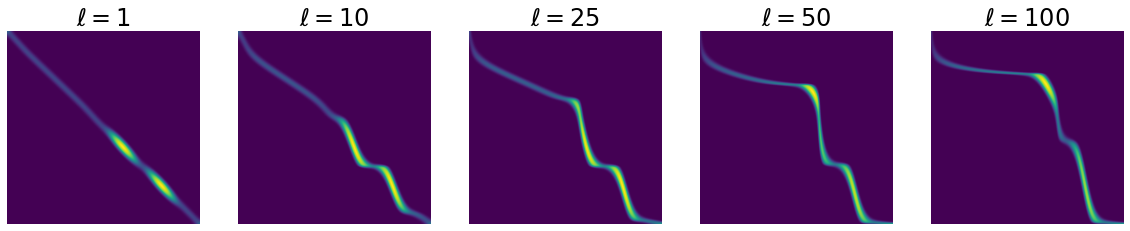

In [684]:
N = 500

st_ = [0, 9, 24, 49, 99]
ii = 0
t = np.arange(0,N)/N

Gaussian = lambda t0,sigma: np.exp(-(t-t0)**2/(2*sigma**2))
normalize = lambda p: p/np.sum(p)

sigma = .06
a = Gaussian(.25,sigma)# + Gaussian(.4,0.07)/2
b = Gaussian(.8,sigma/2) + Gaussian(.6,sigma/2)

vmin = .02;
a = normalize( a+np.max(a)*vmin)
b = normalize( b+np.max(b)*vmin)

epsilon = (0.02)**2
[Y,X] = np.meshgrid(t,t)
K = np.exp(-(X-Y)**2/epsilon)

v = np.ones(N)
plt.figure(figsize=(20, 4))
for i in range(100):
    u = a / (np.dot(K,v))
    v = b / (np.dot(np.transpose(K),u))
    if i == st_[ii]:
        P = np.dot(np.dot(np.diag(u),K),np.diag(v))
        s = np.dot(K,v*t)*u/a
        plt.subplot(1, 5, ii+1)
        plt.title(f'$\ell={st_[ii]+1}$', fontsize=24)
        plt.imshow(np.log(P+1e-5))
        plt.axis('off')
        ii+=1
plt.savefig('iter_range.pdf', bbox_inches='tight')
plt.show()

In [2]:
beta = 0.01 # regularization coefficient 

# # pointcloud: X - center cloud, Y - 3 clouds near X
n, m, d = 500, 500, 3
gauss = lambda q, a, c: a * np.random.randn(q, d) + (np.tile(c, (q, 1)))
X = np.random.randn(n, d) * .3
Y = np.vstack([gauss(int(m / 4), .3, [0,   1.4, -2]),
               gauss(int(m / 4), .3, [-0.99, -0.99, -2]),
               gauss(int(m / 4), .3, [1,  -1, -2]),
               gauss(int(m / 4), .3, [0,   0,  6 ** 0.5])])



#iterations=100,  err=0.004391338350959601, 0.583ms per iteration
Finished


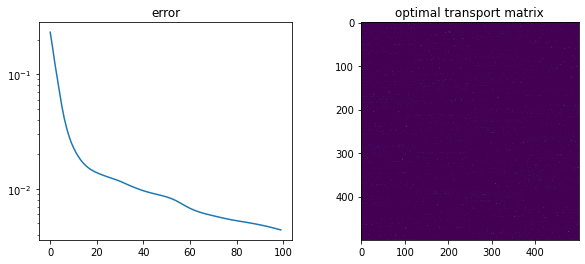

#iterations=100,  err=1.5128720120725966e-09, 0.288ms per iteration
Finished


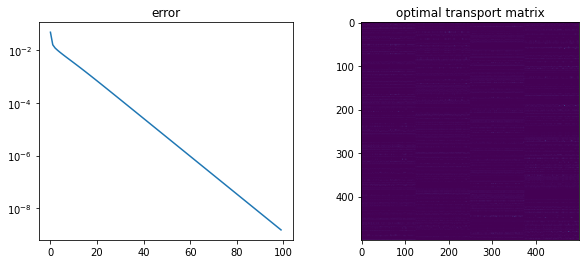

#iterations=100,  err=1.5636586103463754e-18, 0.311ms per iteration
Finished


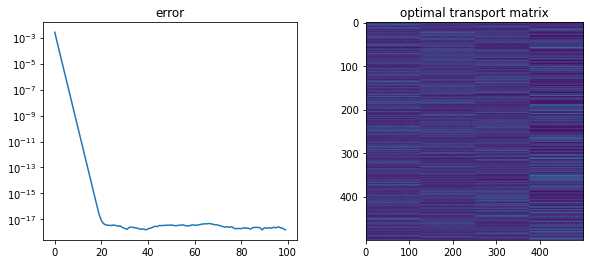

#iterations=100,  err=4.336808689942018e-19, 0.293ms per iteration
Finished


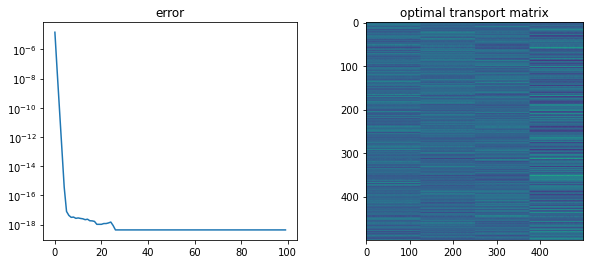

In [44]:
betas = [0.001, 0.01, 0.1, 1.]
allerr = []
for beta in betas:
    _, _, _, err = tinkhorn.sinkhorn(X, Y, beta=beta, max_iter=100, early_stopping=False)
    allerr.append(err)

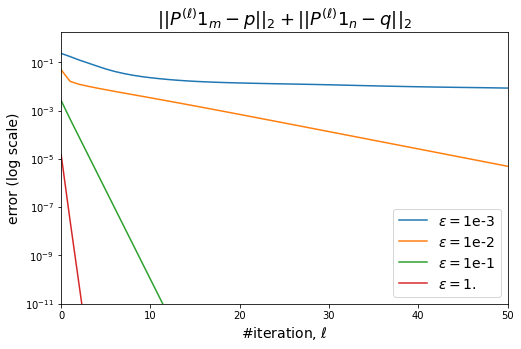

In [56]:
plt.figure(figsize=(8,5))
plt.semilogy(np.array(allerr)[:,1:].T)
plt.xlim(0, 50)
plt.ylim(1e-11, None)
plt.title('$\||P^{(\ell)} 1_m - p\||_2 + \||P^{(\ell)} 1_n - q\||_2$', fontsize=18)
plt.xlabel('#iteration, $\ell$', fontsize=14)
plt.ylabel('error (log scale)', fontsize=14)
plt.legend([ '$\epsilon=$' + x for x in '1e-3 1e-2 1e-1 1.'.split()], fontsize=14)
plt.savefig('conv_rate.pdf')
plt.show()

['0.0001', '0.001', '0.01', '0.1', '0.5', '1.0']